EPL Exploratory Data Analysis in Python

- We will be using a dataset containing data from the English Premier League between 2000 and 2022.
- We will be using DataFrames to examine the dataset in different ways, along with line plots, bar plots, and scatter plots.

## Task 0: Setup

For this analysis we need the `pandas` and `seaborn` Python packages in order to analyze our dataset and generate a few different plots.

### Instructions
Import the following packages.

- Import `pandas` using the alias `pd`.
- Import `seaborn` using the alias `sns`.
- Import the `matplotlib.pyplot` package using the alias `plt`.
- From the `IPython.display` package, import `display` and `Markdown`.

In [2]:
# Import Matplotlib, pandas, and Seaborn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# From the IPython.display package, import display and Markdown
from IPython.display import display, Markdown

## Task 1: Import the EPL data

The English Premier League data is contained in a CSV file named `EPL.csv`.

The dataset contains the following columns.

- `Season`: Season year(s)
- `Pos`: final position that season
- `Team`: name of team 
- `Pld`: Number of matches played 
- `W`: Number of wins
- `D`: Number of draws
- `L`: Number of losses
- `GF`: Goals scored that season
- `GA`: Goals conceded that seasom
- `GD`: Difference in goals scored vs. conceded
- `Pts`: Total points at end of season
- `Qualification or Relegation`: result at end of season


### Instructions

Import the EPL dataset to a pandas dataframe.

- Read the data from `EPL.csv`. Assign to `epl`.
- Print the column info and head to take a look at the data.
- Select only the `'Season'`, `'Team'`, `'Pos'`, `'Pts'`, `'GF'`, `'GD'`, and `'Qualification or relegation'` columns and save them to a new variable `epl_condensed`.

In [3]:
epl = pd.read_csv("EPL.csv")

print(epl.info())
print(epl.head())

epl_condensed = epl[["Season", "Team", "Pos", "Pts", "GF", "GD", "Qualification or relegation"]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Season                       440 non-null    object
 1   Pos                          440 non-null    int64 
 2   Team                         440 non-null    object
 3   Pld                          440 non-null    int64 
 4   W                            440 non-null    int64 
 5   D                            440 non-null    int64 
 6   L                            440 non-null    int64 
 7   GF                           440 non-null    int64 
 8   GA                           440 non-null    int64 
 9   GD                           440 non-null    int64 
 10  Pts                          440 non-null    int64 
 11  Qualification or relegation  440 non-null    object
dtypes: int64(9), object(3)
memory usage: 41.4+ KB
None
    Season  Pos  ... Pts                 

## Task 2: Clean up the Qualification column to make it less _wordy_

We need to make some changes to the imported data in order to make it a little easier to read/work with

- As we can see from calling the `.head()` method on the dataframe, we have 1 column that uses a lot of text, making it difficult to read and work with.
- In this section we are going to write a function to go through out newly created dataframe, editing the values in the 'Qualification or relegation' column.
- This will make the data easier to work with when it comes time to create charts/plots.
- This function will make some assumptions. Entries containing:
    - `Champions League` will be simplified to `Champions League`
    - `UEFA` or `Europa` will be simplified to `Europa`
    - `Relegation` will be simplified to `Relegation`
    - Anything else will be converted to `-`. 

### Instructions

- Define a function using conditional statements to update values qualification or relegation values using the logic given in the task context.

In [4]:
# Create update_result function that updates values to shortened versions and name it 
def update_result(result):
    if 'Champions League' in result:
        result = "Champions League"
    elif 'UEFA' in result or 'Europa' in result:
        result = 'Europa'
    elif 'Relegation' in result:
        result = 'Relegation'
    else:
        result = "-"
    return result

### Instructions

Use your new function to clean up _Qualification or relegation_ column name and values to be more concise.

- Update Column name from 'Qualification or relegation' to 'Result'.
- Apply the function to the 'Result' column.
- Get the value counts for each type of Result in `epl_condensed`, and print.

In [5]:
epl_condensed = epl_condensed.rename(columns={'Qualification or relegation': 'Result'})

epl_condensed['Result'] = epl_condensed['Result'].apply(update_result)

print(epl_condensed['Result'].value_counts())

-                   220
Champions League     89
Europa               68
Relegation           63
Name: Result, dtype: int64


## Task 3: Group by Champions league, and examine the data

We have a clean `Result` column that has categorical data that we can calculate on.

Now we will select data from the `epl_condensed` table and perform some comparisons from season to season for teams that qualify for each competition.

### Instructions

- Create a variable `cl_qual`. Assign it to the Champions league qualifiers from the `epl_condensed` table.
- Create a `cl_qual_stats` variable. Using `cl_qual`, group by season, then aggregate to get maximum position, minimum points, and minimum goal difference.
- Print the qualifier statistics.

In [6]:
cl_qual = epl_condensed[epl_condensed.Result == 'Champions League']

cl_qual_stats = cl_qual.groupby('Season').agg({'Pos':'max', 'Pts': 'min', 'GD': 'min'})

print(cl_qual_stats)

         Pos  Pts  GD
Season               
2000-01    3   69  25
2001-02    4   71  22
2002-03    4   67  15
2003-04    4   60  18
2004-05    5   58  -1
2005-06    4   67  32
2006-07    4   68  28
2007-08    4   76  39
2008-09    4   72  31
2009-10    4   70  26
2010-11    4   68  27
2011-12    6   64  19
2012-13    4   73  32
2013-14    4   79  27
2014-15    4   70  25
2015-16    4   66  29
2016-17    6   69  25
2017-18    4   75  38
2018-19    4   71  24
2019-20    4   66  15
2020-21    4   67  22
2021-22    4   71  29


## Task 4: Your Turn! Do the Same for the Europa League Qualifiers

Now it's your turn to try some calculations. Perform the same analysis that we just did on the Champions League, this time with the Europa League.

### Instructions

Repeat the Champions League analysis on the Europa League qualifiers.

In [7]:
eu_qual = epl_condensed[epl_condensed.Result == 'Europa']

eu_qual_stats = eu_qual.groupby('Season').agg({'Pos': 'max', 'Pts': 'min', 'GD': 'min'})

print(eu_qual_stats)

         Pos  Pts  GD
Season               
2000-01    6   61  15
2001-02   18   36 -23
2002-03    9   51  -7
2003-04   11   48  -8
2004-05    7   55   5
2005-06    9   55  -3
2006-07    7   56  -5
2007-08   11   46  -8
2008-09    7   53   5
2009-10    7   63  13
2010-11   18   39 -21
2011-12    8   52   5
2012-13   18   36 -26
2013-14   16   37 -15
2014-15   12   47  -3
2015-16    7   62  14
2016-17    7   61  18
2017-18    7   54  -3
2018-19    7   57   1
2019-20    8   56   8
2020-21    7   62  15
2021-22    7   56   0


Lets make some observations about this data:
- Most of the time 70+ Pts will qualify you for the Champions League, however not always.
- Usually, it takes around 55 Pts to qualify for the Europa league.
- GD isn't a great predictor of which competition a team will qualify for as there is such a wide range.

There are a couple clear outliers here:
- Only 3 occasions has a team below 4th qualified for the Champions League.
- Only 1 time has a team qualified for the CL with under 60 Pts.
    - In that year, a team also qualified with a negative GD (only time a team has qualified with <10 GD).
- On 3 separate occasions a team has qualified for Europa league and been relegated in the same year.

## Task 5: Plot a Time Series of EPL winners and Relegated teams for 2000&ndash;2022

As we saw above, we can draw some conclusions using tabulated data and summary statistics, however it is often difficult to get the full story or spot trends.

In this section we are going to create our first line plot - comparing the points needed to win the Premier League and the points threshold beneath which teams are relegated.

### Instructions
- Select the teams from the `epl_condensed` table where `'Pos' == 1` and store as `epl_winners`.
- Select the teams from the `epl_condensed` table where `'Pos' == 18` and store as `relegation_zone`.
- Reset the indexes for both.
- Set figure size to be 12 x 6.
- Use seaborn (`sns`) lineplot to Season vs Pts for winners and relegated teams.
- Display the plot.

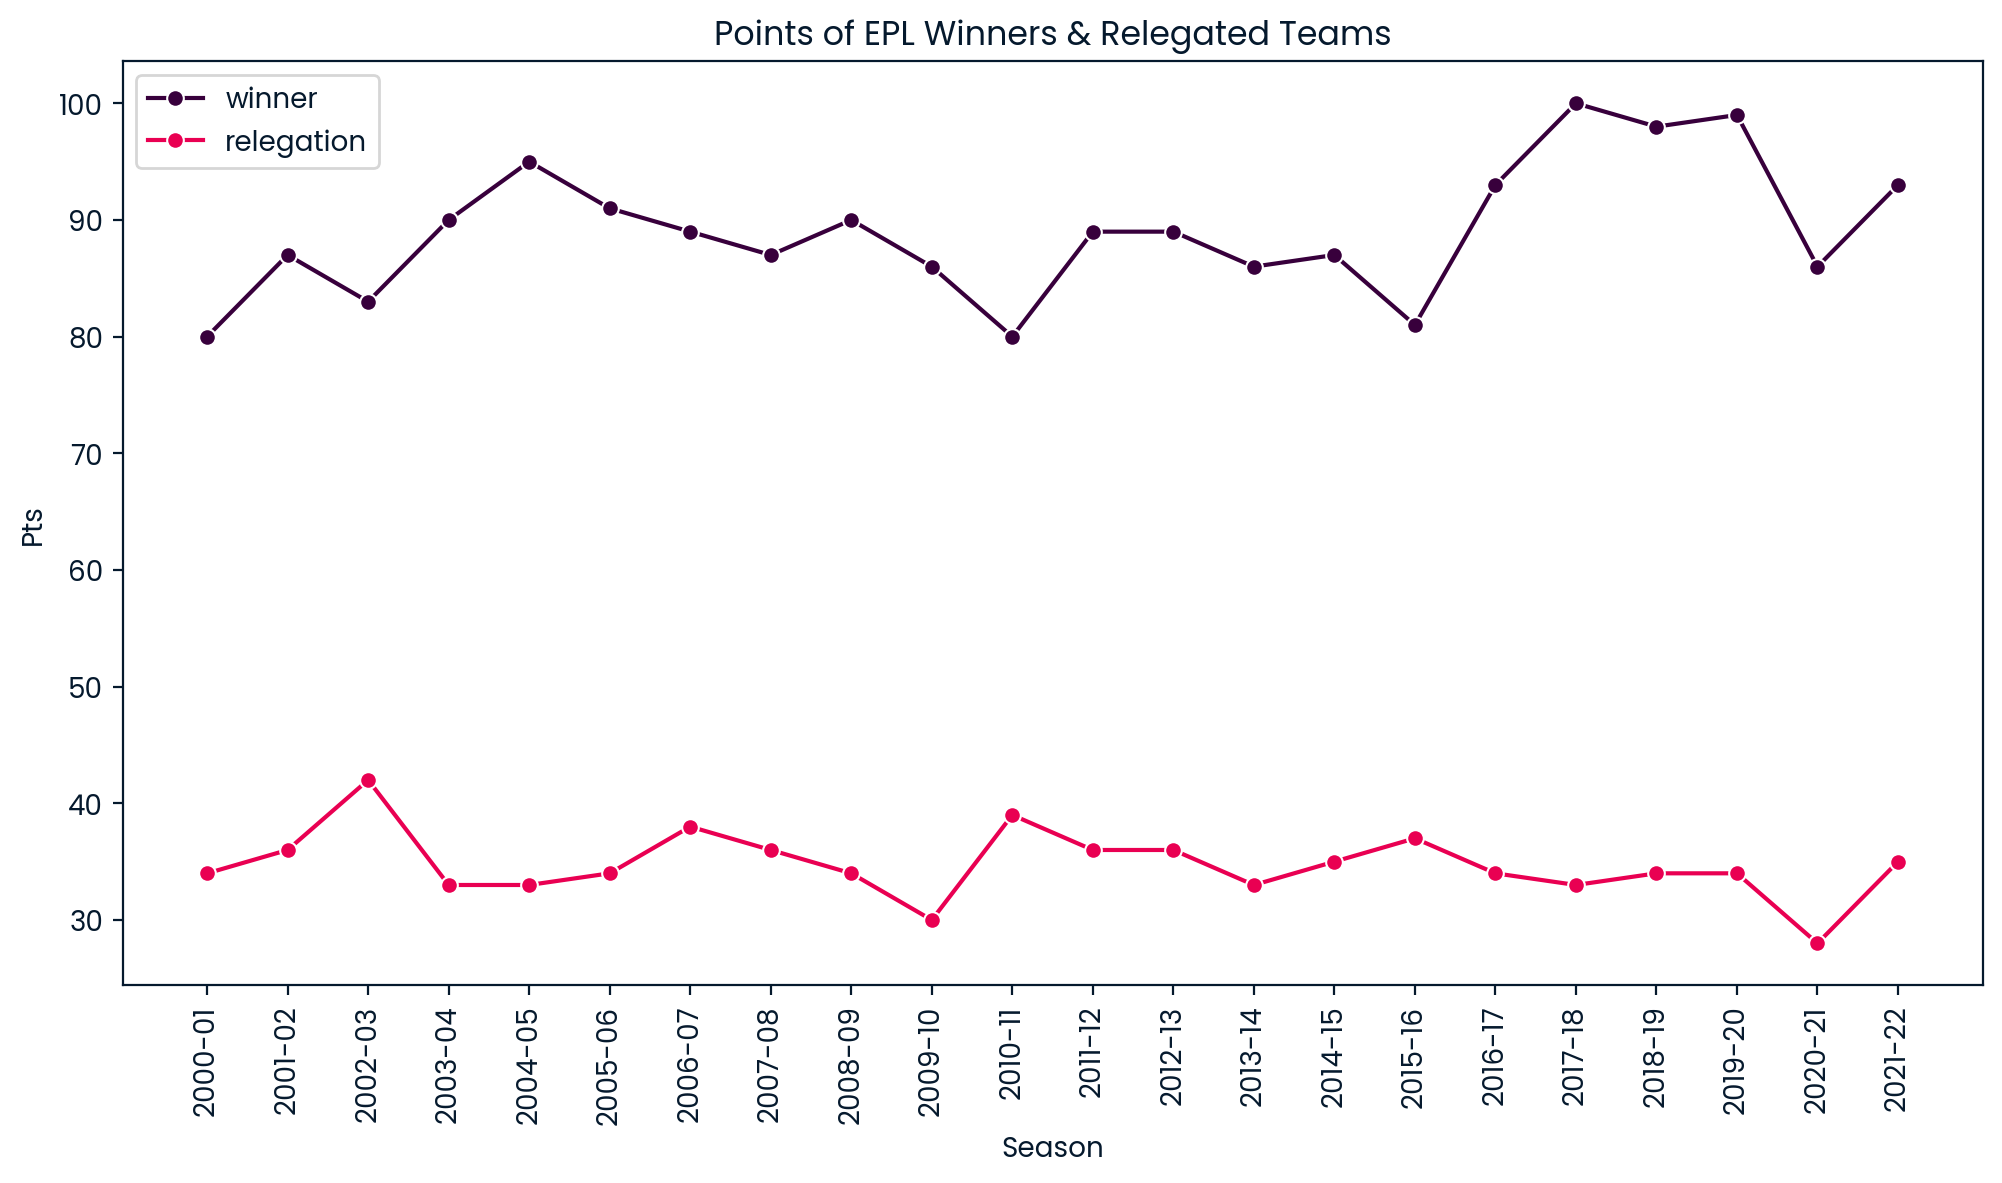

54.31818181818182
-0.31466918678660794


In [8]:
epl_winners = epl_condensed[epl_condensed.Pos == 1]

relegation_zone = epl_condensed[epl_condensed.Pos == 18]

epl_winners = epl_winners.reset_index(drop = True)

relegation_zone = relegation_zone.reset_index(drop = True)

plt.figure(figsize = (12, 6))

sns.lineplot(x = 'Season', y = 'Pts', data = epl_winners, marker = 'o', color = '#38003c', label = 'winner')

sns.lineplot(x = 'Season', y = 'Pts', data = relegation_zone, marker = 'o', color = '#e90052', label = 'relegation')

plt.xticks(rotation = 90)

plt.title("Points of EPL Winners & Relegated Teams")
plt.xlabel("Season")
plt.ylabel("Pts")

plt.show()

print(epl_winners.Pts.sub(relegation_zone.Pts).mean())
print(epl_winners.Pts.corr(relegation_zone.Pts))


- Here we can see there is a weak negative correlation `-0.3` between the amount of Pts to win the premier league vs the amount of points teams need to avoid relegation.
    - A negative correlation means that when top teams do really well, the relegation threshold is usually lower
    - why do you think this is?
- Additionally there is, on average, a 54pt gap from top to bottom.
- We can see from the gap that the _best_ relegated team is pretty much always between 30 and 40 pts (usually around 35).
- We can also clearly see that no team has won the league with less than 80pts (since 2000-01).
- It looks as though the pts needed to win the league is slowly increasing, whereas the pts to avoid relegation are staying roughly the same. 
    - There isn't _really_ enough data to make draw a conclusion on this, however.

## Task 6: Create a Bar Chart Showing Premier League + European Years for Each Team

In this section we are going to compare the number of years each team we have data for has played in the EPL, and compare it with the number of times that team has qualified for one of the European competitions.


### Instructions

- Create a variable `team_counts` and store the number of times each team appears in our `epl_condesed` data.
- This is the number of years each team has been in the premier league.
- To find European qualifications, count the number of times the `'Result'` column in `epl_condensed` has contained `'Europa'` or `'Champions League'` for each team.
- To do this we first need to find the index for each time a team qualified for europe by using the `.isin()` on the `'Result'` column of our `epl_condensed` data. Store this in `euro_ids`
- Filter the `'Teams'` column of the `epl_condensed` data based on `euro_ids`, then return the `.value_counts()`. Store this as `euro_year_counts`

In [9]:
team_counts = epl_condensed['Team'].value_counts()

euro_ids = epl_condensed['Result'].isin(["Europa", "Champions League"])

euro_year_counts = epl_condensed[euro_ids]['Team'].value_counts()

euro_year_counts

Manchester United          21
Chelsea                    21
Arsenal                    21
Liverpool                  19
Tottenham Hotspur          16
Manchester City            15
Everton                     6
West Ham United             5
Newcastle United            4
Blackburn Rovers            3
Southampton                 3
Leicester City              3
Ipswich Town                2
Middlesbrough               2
Bolton Wanderers            2
Leeds United                2
Aston Villa                 2
Fulham                      2
Wigan Athletic              1
Burnley                     1
Hull City                   1
Portsmouth                  1
Swansea City                1
Birmingham City             1
Stoke City                  1
Wolverhampton Wanderers     1
Name: Team, dtype: int64

### Instructions

- Draw bar plots for `team_counts` and `euro_year_counts` to see how many seasons each team has been in the Premier League, and how many times each team has qualified for european competitions.

- For the `team_counts` plot:
    - Color the bars with `#38003c`.
    - Set the y-axis label to `Years in EPL`
    - Rotate x-axis labels by 90 degrees.
    - Show the plot.
   
- Draw the same plot but with `euro_year_counts` on the y-axis to see how many times each team has qualified for european competitons.
    - This time color the bars with `#e90052`.
    - Set the y-axis label to `Years in European Competition`

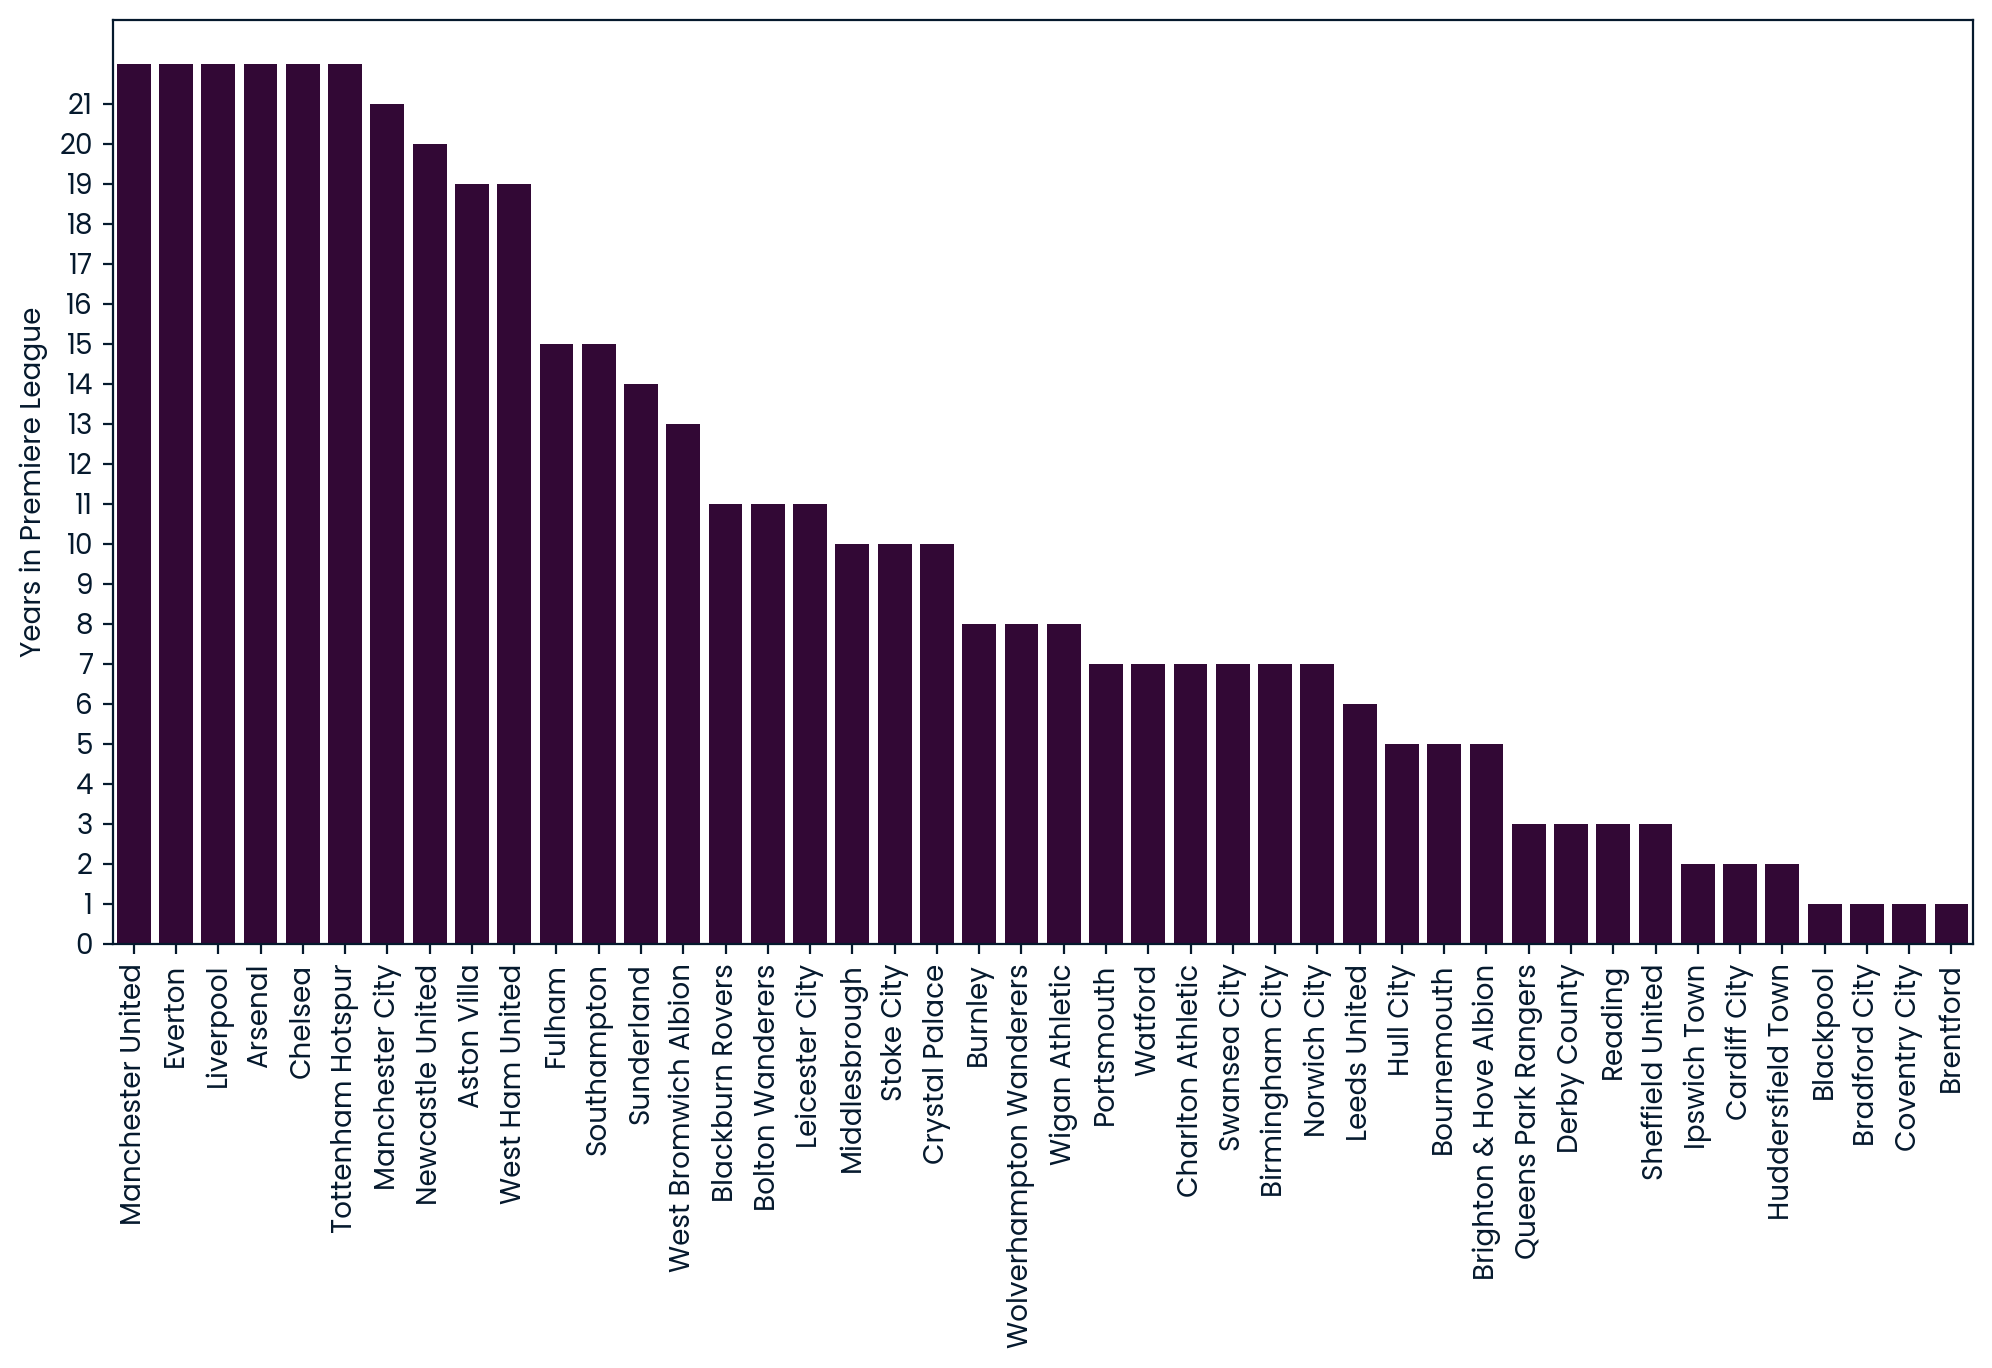

In [10]:
plt.figure(figsize = (12, 6))
sns.barplot(data = team_counts, color = '#38003c')
plt.ylabel("Years in Premiere League")
plt.xticks(rotation = 90)
plt.yticks(range(0,22,1))
plt.show()

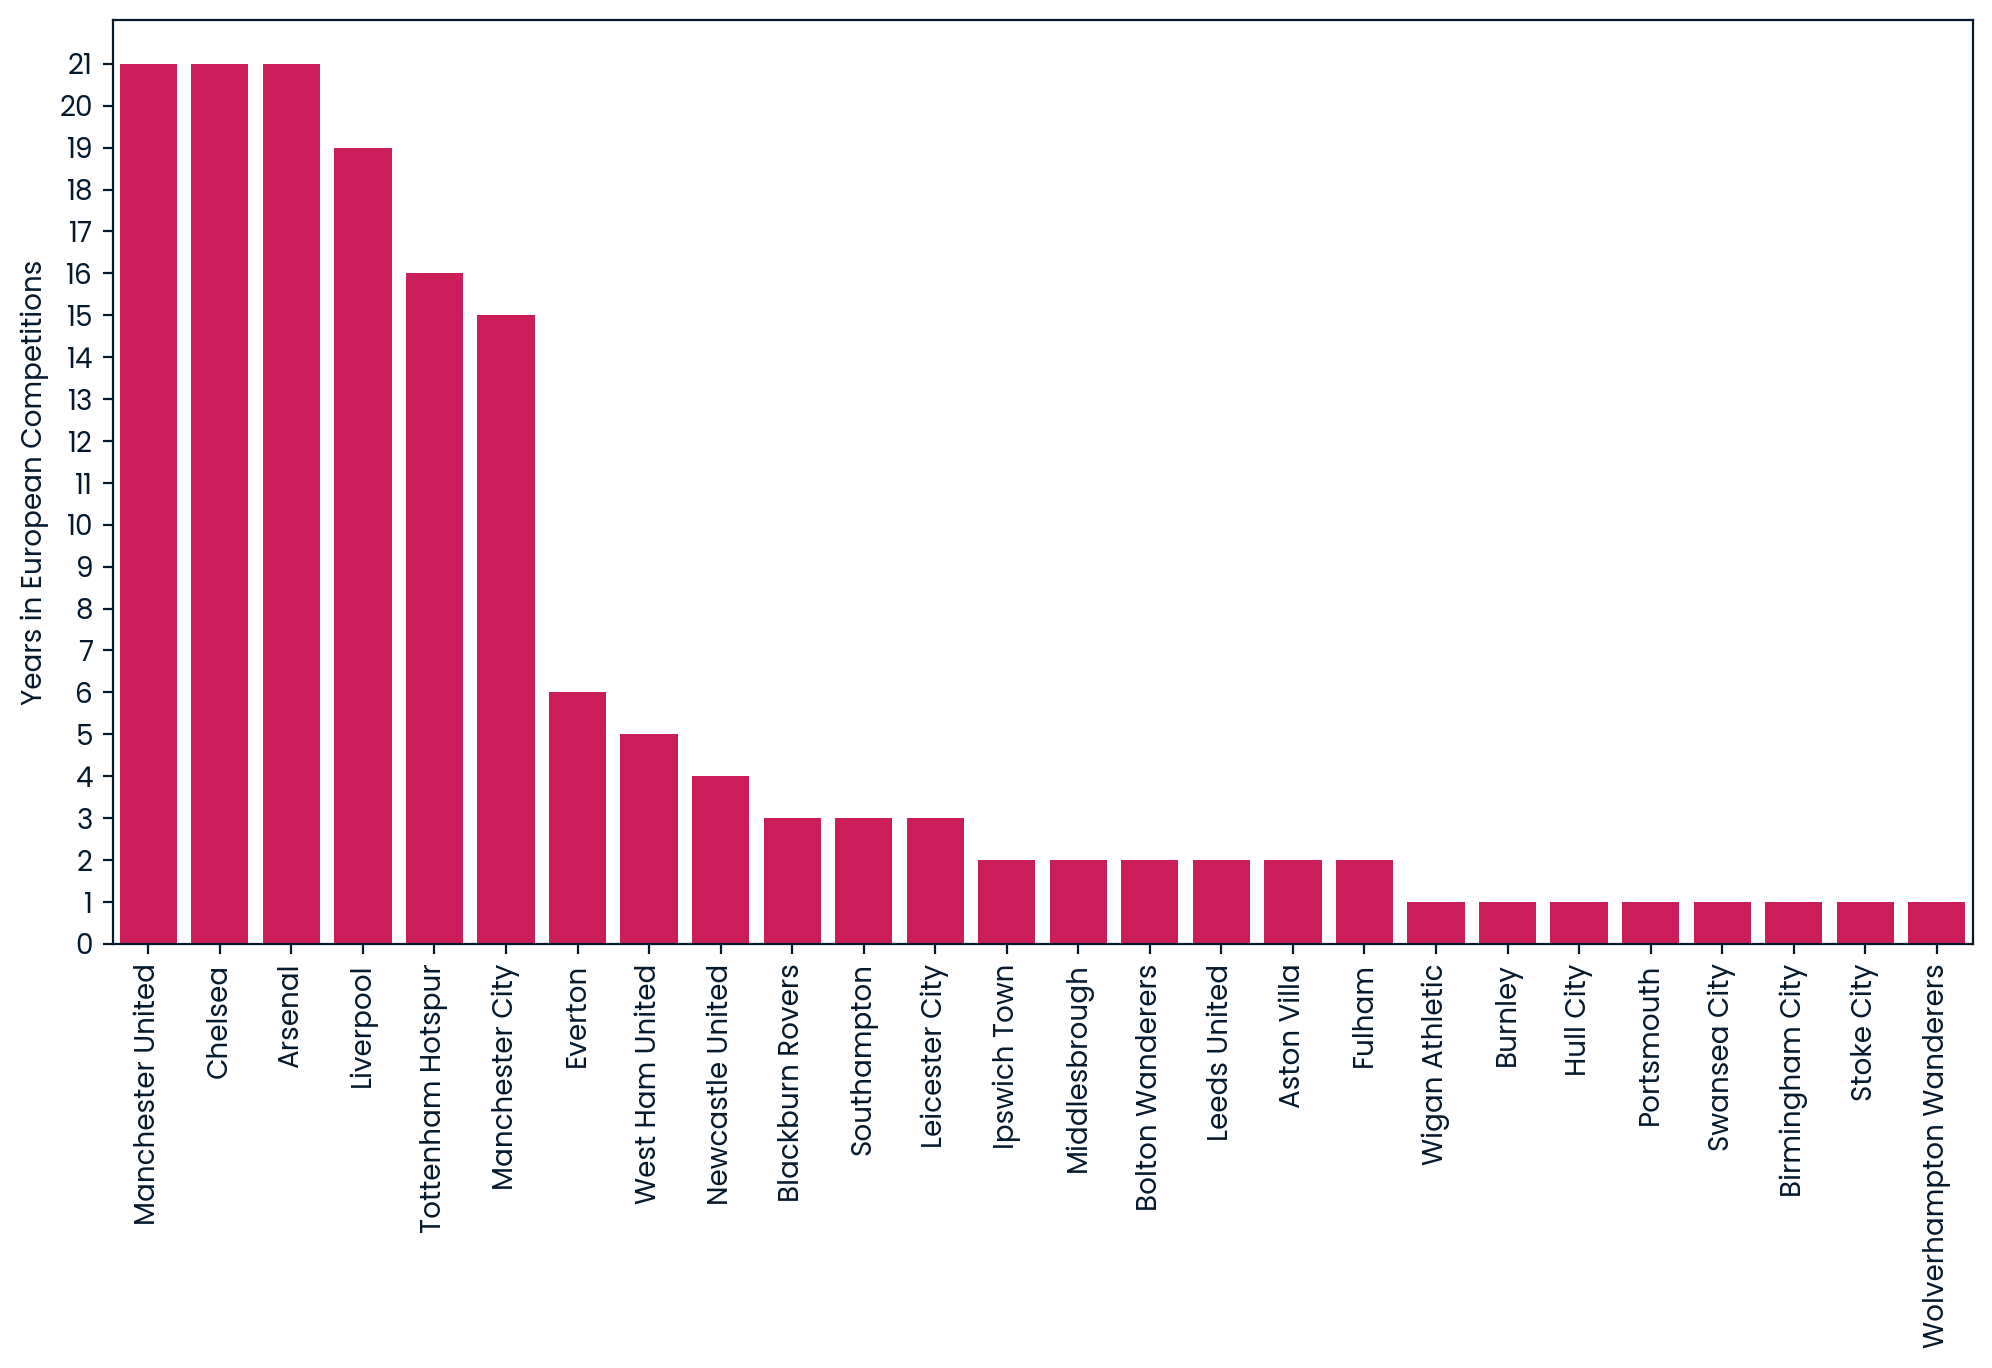

In [11]:
plt.figure(figsize = (12, 6))
sns.barplot(data = euro_year_counts, color = '#e90052')
plt.ylabel("Years in European Competitions")
plt.xticks(rotation = 90)
plt.yticks(range(0,22,1))
plt.show()

## Task 7: Examine how GD and Pts are linked

### Instructions

- filter the `epl_condensed` team column to only contain the `'Chelsea'` values. Store this as `chelsea`
- Plot `GD` per-season for `chelsea` and store it as `ax`.
- Use `.twinx()` to create an _invisible_ x-axis and independent y-axis for `ax2`.
- plot `Pts` per-season for `chelsea` and set `ax=ax2`.
- Create the legend for the graph to display labels for each series.
- Remove the legend from `ax2` as we only want one legend on the graph.

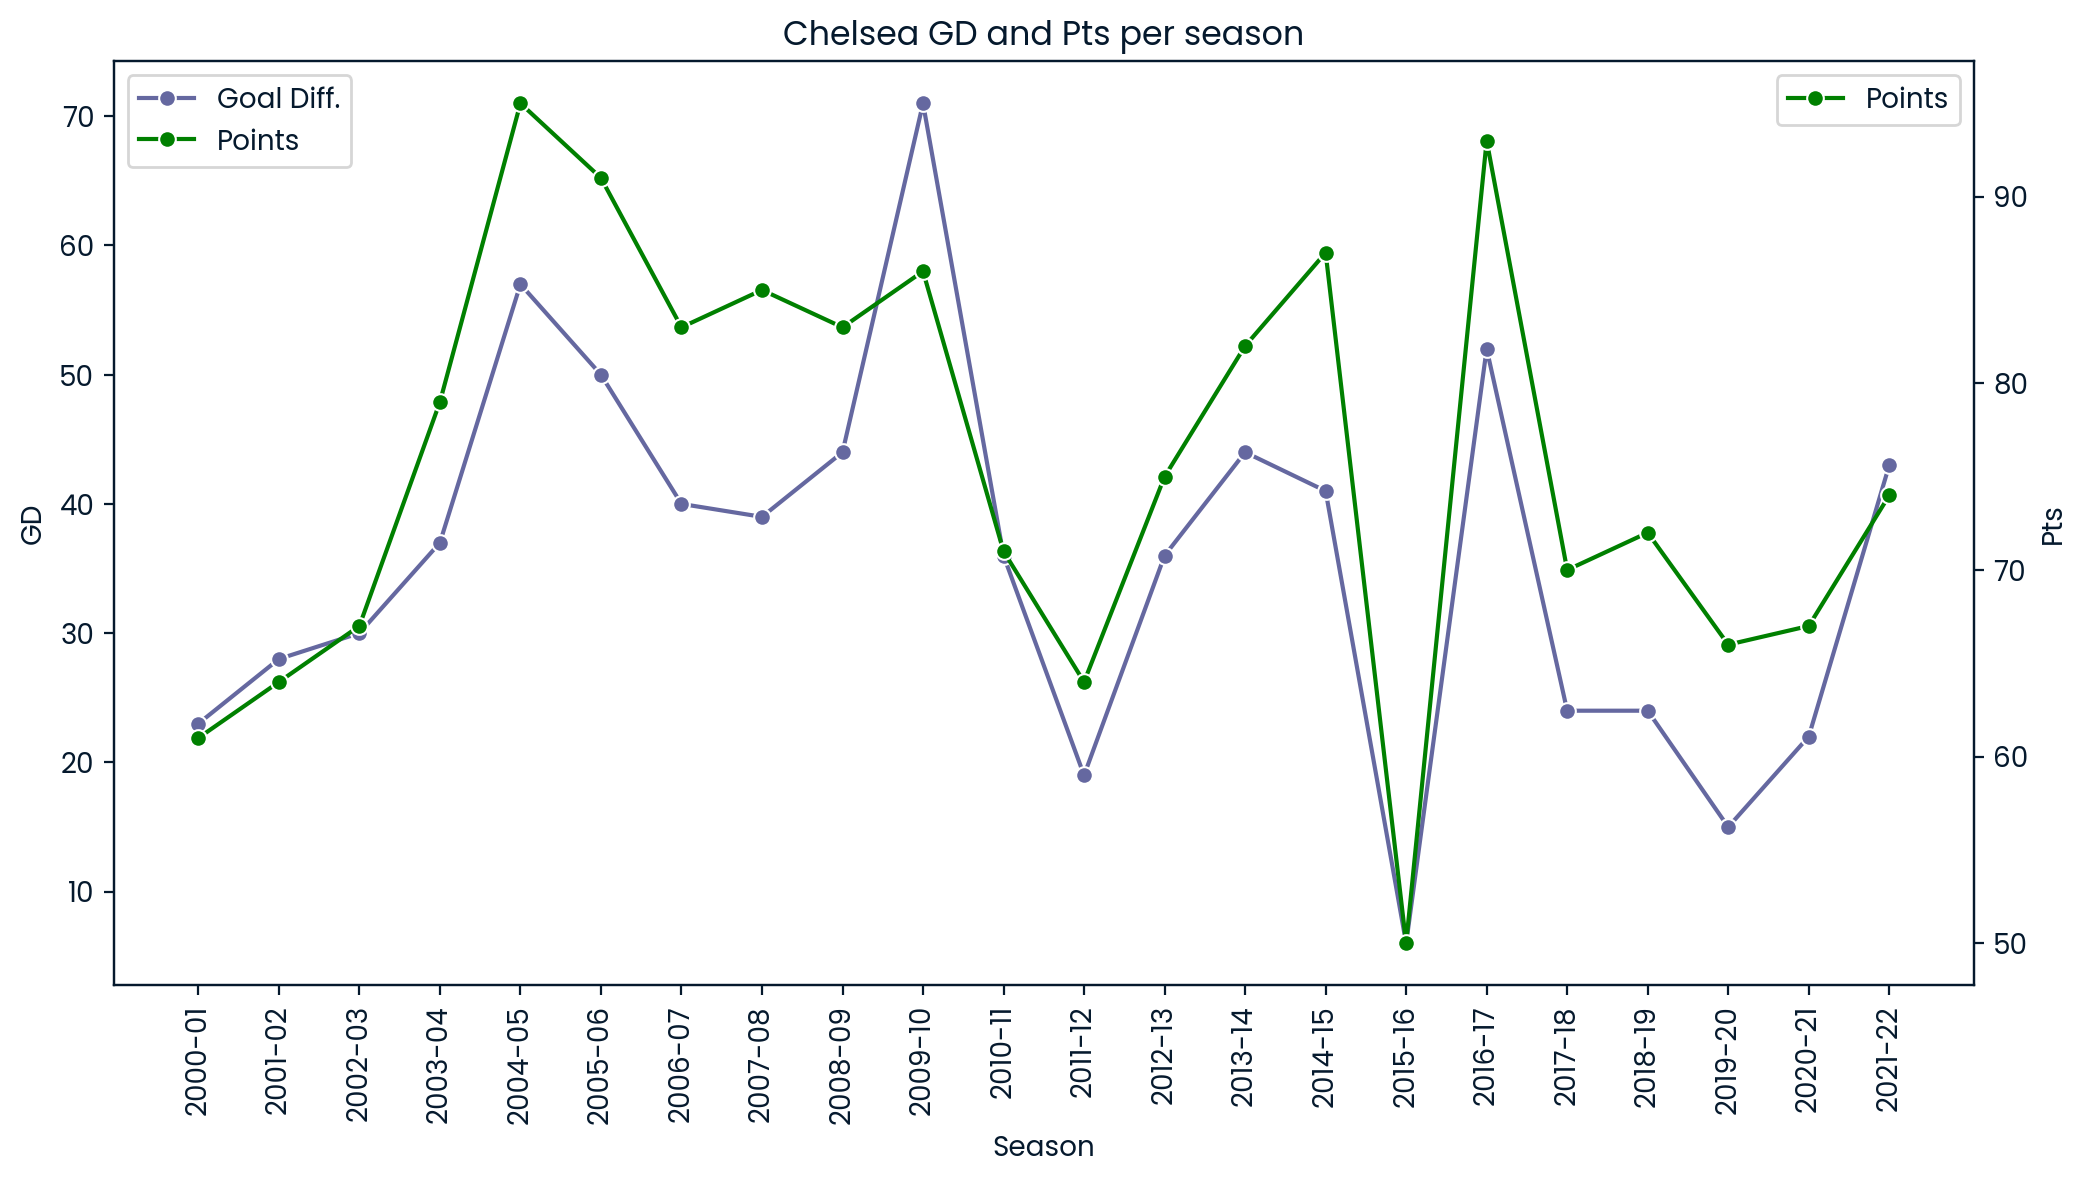

In [12]:
chelsea = epl_condensed[epl_condensed['Team'] == 'Chelsea']

plt.figure(figsize = (12, 6))
ax = sns.lineplot(x = 'Season', y = 'GD', data = chelsea, label = 'Goal Diff.', marker='o')
ax2 = ax.twinx()

sns.lineplot(x='Season', y='Pts', data=chelsea, label='Points', ax=ax2, marker='o', color='green')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax.legend(lines + lines2, labels + labels2, loc='upper left')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

plt.title("Chelsea GD and Pts per season")
plt.show()

- We saw from the bar chart above, there was only one season from 2000-01 until 2021-22 that Chelsea did not qualify for a european competition
    - There is an outlier on this graph that looks like it may be the culprit!
    - Chelsea did not qualify for Europe during the 2015-16 season, however they bounced back and won the Premier League the following year
   
- As the Y-axes are independent of one another, the main purpose of this chart is to compare the shapes of the series
- We can see there is a very similar shape to both lines, which means we can reasonably assume there is fairly strong correaltion between the number of Pts a team will achieve in a season and their Goal Difference. 
- as this is only 21 data points, it may be better to test this hypothesis on a larger dataset


## Task 8: Examine the wider correlation for Pts and GD 

As we saw above, there seemed to be a pretty strong correlation between Chelsea's Goal Difference YoY, and the number of Pts they would earn during a season. Lets make this same comparison, but this time we will take every team's points-per-year and their avg. GD, then plot them on a scatter graph and calculate the correlation.

### Instructions
- Group our original data, `epl`, by `'Team'` then aggregate the `'GD'` and `'Pts'` columns to get their mean values. 
- Store this as `epl_team_stats`.
- Use the `.round()` method to round the outputs to 1 decimal.
- Use seaborn to create a `scatterplot` of `'GD'` vs `'Pts'` using the `epl_team_stats`.
- Use the `.corr()` method to calculate the correlation coefficient between `'GD'` and `'Pts'`.
- Print the correlation coefficient, and round it to 2 decimals.
- Display the plot.

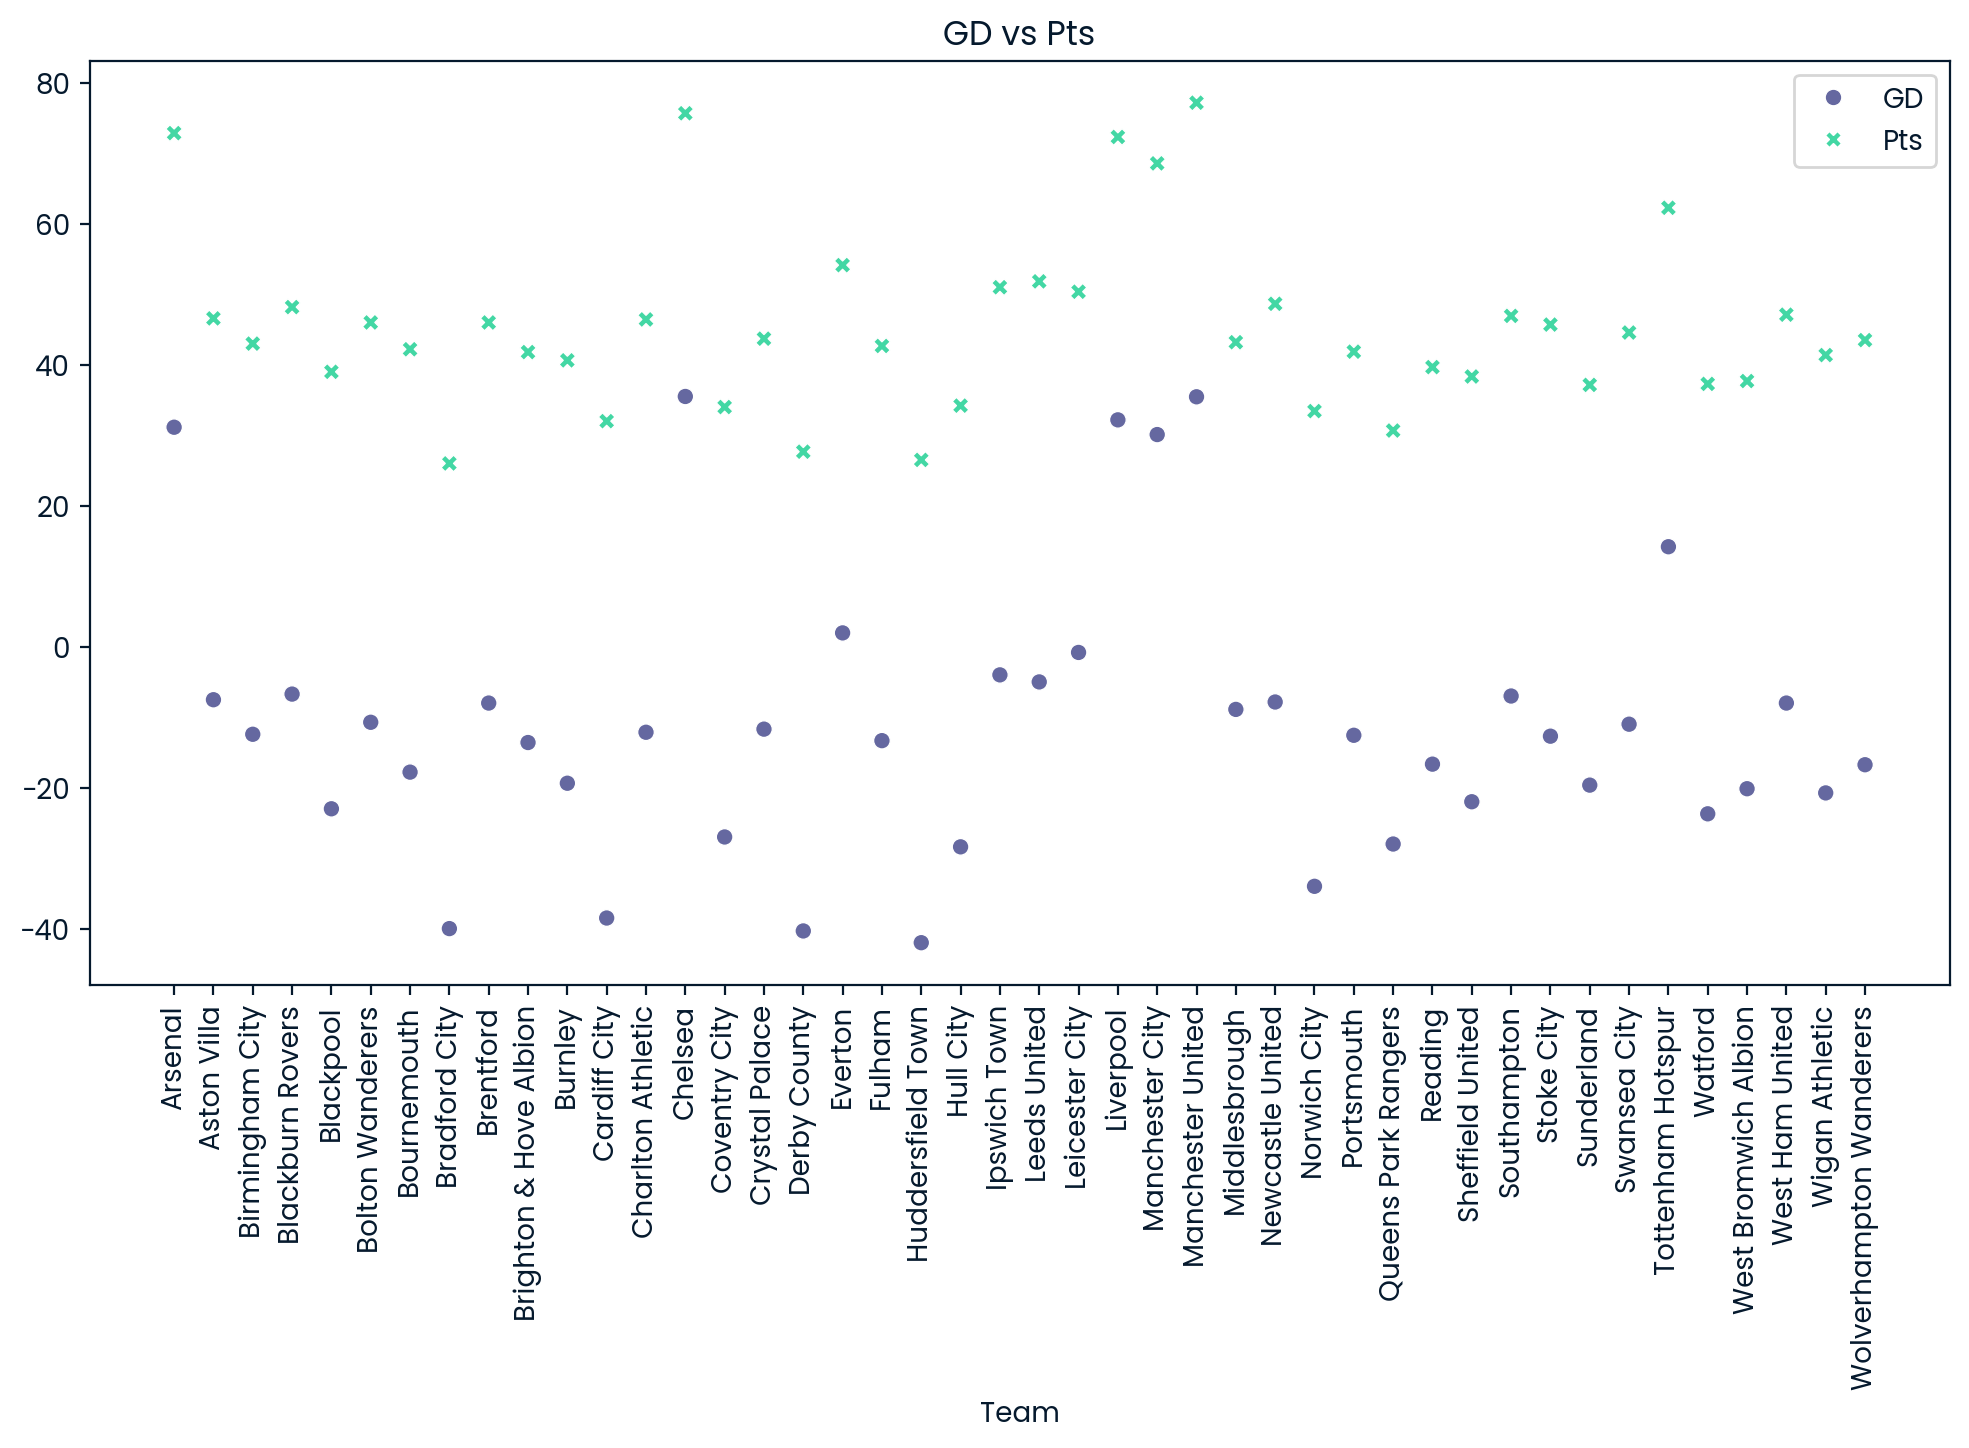

,GD,Pts
GD,1.00,0.99
Pts,0.99,1.00


In [29]:
plt.figure(figsize = (12, 6))
epl_team_stats = epl.groupby('Team').agg({'GD': 'mean', 'Pts': 'mean'})
epl_team_stats.round()

sns.scatterplot(epl_team_stats)

plt.title("GD vs Pts")
plt.xticks(rotation = 90)
plt.show()

epl_team_stats.corr().round(2)


- We can see there seems to be a very tight grouping of teams along an imaginary line.
- The correlation coefficient of 0.99 indicates there is a very strong correlation between the average points/season a team earns, and their average GD.
    - This means our initial _guess_ from our smaller dataset (Chelsea) was correct, however be wary as this will not-often be the case!